# STA 208: Homework 3
This is based on the material in Chapter 4 of 'Elements of Statistical Learning' (ESL), in addition to lectures 7-8.  Chunzhe Zhang came up with the dataset and the analysis in the second section.

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements (beginning with __Exercise X.X__).  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

In the conceptual exercises you should provide an explanation, with math when necessary, for any answers.  When answering with math you should use basic LaTeX, as in 
$$E(Y|X=x) = \int_{\mathcal{Y}} f_{Y|X}(y|x) dy = \int_{\mathcal{Y}} \frac{f_{Y,X}(y,x)}{f_{X}(x)} dy$$
for displayed equations, and $R_{i,j} = 2^{-|i-j|}$ for inline equations.  (To see the contents of this cell in markdown, double click on it or hit Enter in escape mode.)  To see a list of latex math symbols see here: http://web.ift.uib.no/Teori/KURS/WRK/TeX/symALL.html

When writing pseudocode, you should use enumerated lists, such as 

__Algorithm: Ordinary Least Squares Fit__
(Input: X, y; 
Output: $\beta$)
1. Initialize the $p \times p$ Gram matrix, $G \gets 0$, and the vector $b \gets 0$.
2. For each sample, $x_i$:
 1. $G \gets G + x_i x_i^\top$.
 2. $b \gets b + y_i x_i$
3. Solve the linear system $G \beta = b$ and return $\beta$


__Exercise 1.1__ (10 pts - 2 each)

Recall that surrogate losses for large margin classification take the form, $\phi(y_i x_i^\top \beta)$ where $y_i \in \{-1,1\}$ and $\beta, x_i \in \mathbb R^p$.

The following functions are used as surrogate losses for large margin classification.  Demonstrate if they are convex or not, and follow the instructions.

1. exponential loss: $\phi(x) = e^{-x}$
1. truncated quadratic loss: $\phi(x) = (\max\{1-x,0\})^2$
1. hinge loss: $\phi(x) = \max\{1-x,0\}$
1. sigmoid loss: $\phi(x) = 1 - \tanh(\kappa x)$, for fixed $\kappa > 0$
1. Plot these as a function of $x$.

(This problem is due to notes of Larry Wasserman.) 


1. when we calculate the second derivitive we can find out that $\phi(x)''=e^{-x}$, which is always larger than 0. Accordingly, exponential loss is convex.
2. when we calculate the second derivitive we can find out that, the second derivitive higher or equal than 0 when two point locate at same direction, when they locate in different area, i still satisfy convex requirement. Accordingly, truncated quadratic loss is convex.
$\begin{cases}
\phi(x)=(1-x)^2   & \phi''(x)=2& x,y<1 \\ 
\phi (x)=0 & \phi''(x)=0& x,y\geq 1
\end{cases}$

  When $x<1,y \geq 1$
$\begin{align*}
t\phi(x)+(1-t)\phi(y)&=t(1-x)^2+0 \\
\phi(tx+(1-t)y)&=\max\{0,(1-tx-(1-t)y)^2\} \\
&=\max\{0,(1-t+t-tx-(1-t)y)^2\} \\
&=\max\{0,(t(1-x)+(1-t)(1-y))^2\} \quad 1-x>0,1-y <0
\end{align*}$
$$\begin{cases}
(t(1-x)+(1-t)(1-y))^2<t^2(1-x)^2<t(1-x)^2   & tx+(1-t)y<1 \\ 
0<t(1-x)^2   & tx+(1-t)y \geq 1 
\end{cases}$$
3.Hinge loss is a little bit different than quadratic loss, we can prove with defination.
the original function can be writen as below$$\left\{\begin{matrix}
\phi(x)=1-x & x<1\\ 
\phi(x)=0 & x\geq 1
\end{matrix}\right.$$
Then we can calculate the relationship between $\phi(tx+(1-t)y)$ and $t\phi(x)+(1-t)\phi(y)$ where $t\in(0,1)$ and $x<y$, from calculation and plot below we can easily find that 
$$\left\{\begin{matrix}
\phi(tx+(1-t)y)=t\phi(x)+(1-t)\phi(y) & x<1,y<1\\ 
\phi(tx+(1-t)y)=t\phi(x)+(1-t)\phi(y) & x\geq 1,y\geq1 \\
\phi(tx+(1-t)y)<t\phi(x)+(1-t)\phi(y) & x<1,y\geq1
\end{matrix}\right.$$

  when $tx+(1-t)y>1$
  $\phi(tx+(1-t)y)=0,t\phi(x)>0$ and $(1-t)\phi(y)=0$, so $ \phi(tx+(1-t)y)<t\phi(x)+(1-t)\phi(y)$,   

  when $tx+(1-t)y<1$

$\begin{align*}
\phi(tx+(1-t)y)&=(1-(tx+(1-t)y) \\
t\phi(x)+(1-t)\phi(y)&=t(1-x) \\
\phi(tx+(1-t)y)-t\phi(x)+(1-t)\phi(y)&=(1-y)(1-t)<0 \\
\phi(tx+(1-t)y) &< t\phi(x)+(1-t)\phi(y)
\end{align*}$

Accordingly, hinge loss is convex.

4.for sigmoid loss, we can directily find that this one is not convex, and we can prove this with calculation example
$$\begin{matrix}
\kappa=1, x=-3, y=-1, t=0.5\\ 
\phi(tx+(1-t)y)=1.964\\
t\phi(x)+(1-t)\phi(y)=1.878\\
\phi(tx+(1-t)y)>t\phi(x)+(1-t)\phi(y)
\end{matrix}$$
Accordingly, sigmoid loss is not convex.

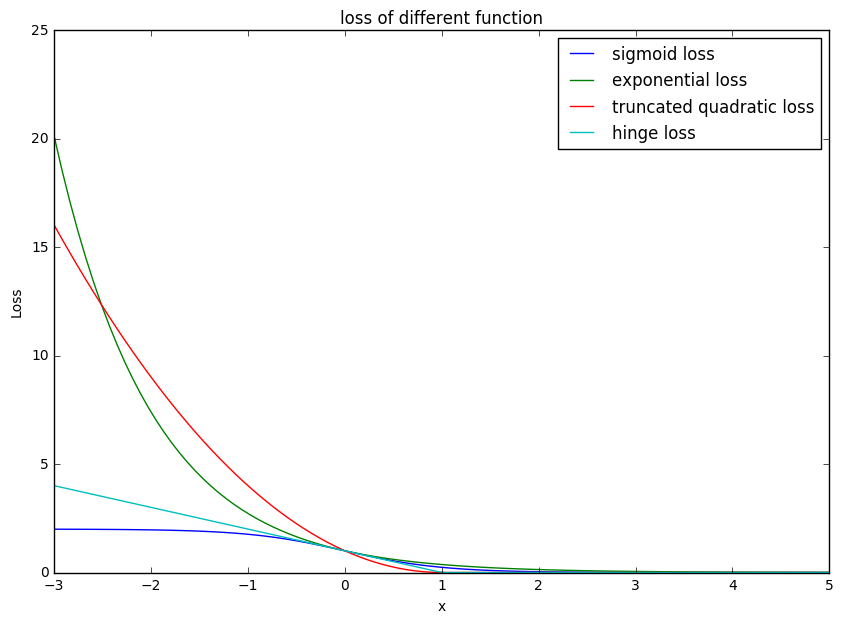

In [21]:
xx = np.linspace(-3,5,100)
exp = np.exp(-xx)
qua = map(lambda x: (1-x)**2 if x<1 else 0,xx )
hin = map(lambda x: 1-x if x<1 else 0,xx )
sig = 1 - np.tanh(xx)
plt.figure(figsize=(10,7))
plt.plot(xx,sig,label='sigmoid loss')
plt.plot(xx,exp,label='exponential loss')
plt.plot(xx,qua,label='truncated quadratic loss')
plt.plot(xx,hin,label='hinge loss')
plt.xlabel('x')
plt.ylabel('Loss')
plt.title('loss of different function')
plt.legend()
plt.show()

__Exercise 1.2__ (10 pts)

Consider the truncated quadratic loss from (1.1.2).  For brevity let $a_+ = max\{a,0\}$ denote the positive part of $a$.

$$\ell(y_i,x_i,\beta) = \phi(y_i x_i^\top \beta) = (1-y_i x_i^\top \beta)_+^2$$

1. Consider the empirical risk, $R_n$ (the average loss over a training set) for the truncated quadratic loss.  What is gradient of $R_n$ in $\beta$?  Does it always exists?
1. Demonstrate that the gradient does not have continuous derivative everywhere.
1. Recall that support vector machines used the hinge loss $(1 - y_i x_i^\top)_+$ with a ridge regularization.  Write the regularized optimization method for the truncated quadratic loss, and derive the gradient of the regularized empirical risk.
1. Because the loss does not have continuous Hessian, instead of the Newton method, we will use a quasi-Newton method that replaces the Hessian with a quasi-Hessian (another matrix that is meant to approximate the Hessian).  Consider the following quasi-Hessian of the regularized objective to be $$G(\beta) = \frac 1n \sum_i 2 (x_i x_i^\top 1\{ y_i x_i^\top \beta > 1 \}) + 2 \lambda.$$  Demonstrate that the quasi-Hessian is positive definite, and write pseudo-code for quasi-Newton optimization.  (There was a correction in the lectures, that when minimizing a function you should subtract the gradient $\beta \gets \beta - H^{-1} g$).

1. the gradient of $R_n$ is 

  $\begin{align*}
\triangledown&=\frac{1}{n}\sum'(1-y_i x_i^\top \beta)_+^2\\
&=\frac{1}{n}\sum2(-y_i x_i)(1-y_i x_i^\top \beta)_+
\end{align*}$

  we can find out it always exists.
2. If we do the derivative for gradient it will come to $\frac{1}{n}\sum(2y_i^2 x_i^2)_+$, it means on one side it's an positive constant, on the other side, it will be 0, so the gradient does not have continuous derivative everywhere.

3. regularized optimization method for the truncated quadratic loss is $\frac{1}{n}\sum(1-y_i x_i^\top \beta)_+^2+\lambda  \left \| \beta \right \|^2$, then we can find the gradient $$\frac{1}{n}\sum2(-y_i x_i)(1-y_i x_i^\top \beta)_++2\lambda \beta$$
4. In order to prove quasi-Hessian is positive definite, we can try to prove $z^TG(\beta)z\geq 0$, where $z$ is any matrix. Then we got $$z^TG(\beta)z=\frac 1n \sum_i 2 (z^Tx_i x_i^z\top 1\{ y_i x_i^\top \beta > 1 \}) + 2 \lambda z^Tz$$ we can use $w^T=z^Tx$ to transform this equation, and we got $$z^TG(\beta)z=\frac 1n \sum_i 2 (w^Tw\top 1\{ y_i x_i^\top \beta > 1 \}) + 2 \lambda z^Tz$$ which is definitely higher or equal to 0, so the quasi-Hessian is positive definite.

  __pseudo-code for quasi-Newton optimization__
(Input: X, y; 
Output: $\beta$)
since we don't have continuous Hessian,$G(\beta) = \frac 1n \sum_i 2 (x_i x_i^\top 1\{ y_i x_i^\top \beta > 1 \}) + 2 \lambda I_n$

  (1). Use G to substitude H.
    1. $\beta^{n+1}\leftarrow \beta^{n}-H^{-1}g$ for Newton
  
    2. $\beta^{n+1}\leftarrow \beta^{n}-G^{-1}g$ for quasi Newton
  
  (2). Let $Gs=g$ and solve s, since $G$ is positive difinite, we can use cholesky to solve s

  (3). $\beta^{n+1}\leftarrow \beta^{n}-s$

# HW3 Logistic, LDA, SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# dataset path
data_dir = "."

The following code reads the data, subselects the $y$ and $X$ variables, and makes a training and test split.  This is the Abalone dataset and we will be predicting the age. V9 is age, 1 represents old, 0 represents young. 

In [3]:
sample_data = pd.read_csv(data_dir+"/hw3.csv", delimiter=',')
sample_data.V1=sample_data.V1.factorize()[0]

X = np.array(sample_data.iloc[:,range(0,8)])
y = np.array(sample_data.iloc[:,8])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

__Exercise 2.1__ (10 pts) Perform logistic regression using Newton conjugate gradient.  You should save the predicted probabilities, and save the roc and pr curves (using roc_curve and precision_recall_curve) computed using the test set.

In [29]:
logit = skl_lm.LogisticRegression(solver='newton-cg')
logit.fit(X_train,y_train)
prob = logit.predict_proba(X_test)
logfpr, logtpr, logthr = roc_curve(y_test, prob[:,1])
logpre, logrec, logthresh = precision_recall_curve(y_test, prob[:,1])

__Exercise 2.2__ (10 pts) Do the same for linear discriminant analysis.

In [38]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)
pred = lda.predict_proba(X_test)
ldafpr, ldatpr, ldathr = roc_curve(y_test, pred[:,1])
ldapre, ldarec, ldathresh = precision_recall_curve(y_test, pred[:,1])

__Exercise 2.3__ (10 pts) Do the same for support vector machines.

In [40]:
svc = SVC(probability=True)
svc.fit(X_train,y_train)
pred = svc.predict_proba(X_test)
svcfpr, svctpr, svcthr = roc_curve(y_test, pred[:,1])
svcpre, svcrec, svcthresh = precision_recall_curve(y_test, pred[:,1])

__Exercise 2.4__ (10 pts) Plot and compare the ROC and PR curves for the above methods.

From the plots below we can find out that the performance of logistic and LDA are always quite similar. For Support vector classification, when recall between 0.8 and 0.9, or False Positive Rate between 0.2 and 0.3, it perform worser than LDA and logistric. This make sence since Linear discriminant analysis are quite similar to Logistic regression, except that LDA assumes that observations are drawn from normal distribution. Accordingly, for most time, these two methods should have similar performance. For SVM, it will not performe better than LDA and Logitic in linear condition. However, it will have better performance in high dimensional condition or Non-linear Decision Boundaries. 

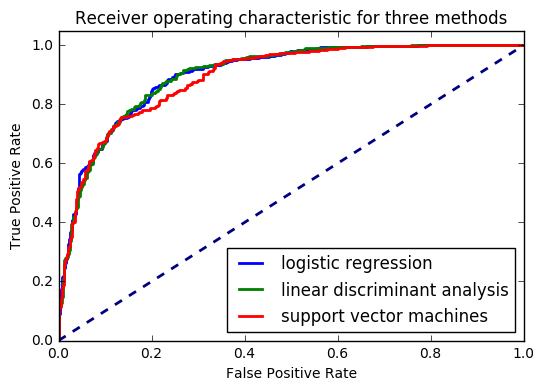

In [41]:
plt.figure()
lw = 2
plt.plot(logfpr,logtpr,lw=lw, label='logistic regression')
plt.plot(ldafpr,ldatpr,lw=lw, label='linear discriminant analysis')
plt.plot(svcfpr,svctpr,lw=lw, label='support vector machines')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for three methods')
plt.legend(loc="lower right")
plt.show()

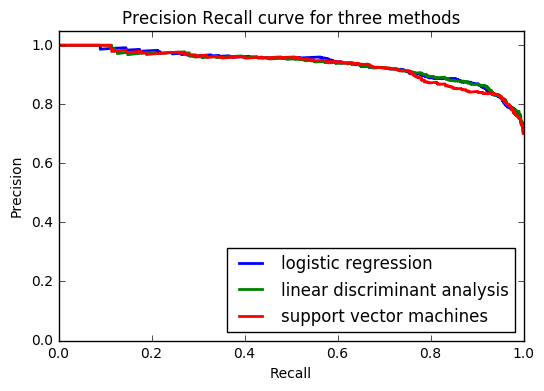

In [46]:
plt.figure()
lw = 2
plt.plot(logrec,logpre,lw=lw, label='logistic regression')
plt.plot(ldarec,ldapre,lw=lw, label='linear discriminant analysis')
plt.plot(svcrec,svcpre,lw=lw, label='support vector machines')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve for three methods')
plt.legend(loc="lower right")
plt.show()